In [91]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn
import nltk
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import re
import pickle

In [4]:
pyplot.rcParams["figure.figsize"] = (15, 12)

In [6]:
classes_list=["Bad","Good"]

Data set link : https://www.kaggle.com/datasets/vigneshwarsofficial/reviews

In [7]:
filename="Restaurant_Reviews.tsv"

In [10]:
data=pandas.read_table('../Data/Main_Data/'+filename)

In [13]:
class_column='Liked'
review_column='Review'

In [14]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [47]:
Positive_data=data[data[class_column]==1]
Nagative_Data=data[data[class_column]==0]

In [48]:
Positive_data

,Review,Liked
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1
...,...,...
899,"Overall, a great experience.",1
901,Their regular toasted bread was equally satisf...,1
907,The chips and sals a here is amazing!!!!!!!!!!...,1
909,This is my new fav Vegas buffet spot.,1


In [49]:
Nagative_Data

,Review,Liked
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [50]:
Whole_Positive_Words_list=[text for text in Positive_data[review_column]]
Whole_Positive_Words_list=" ".join(Whole_Positive_Words_list)
Whole_Positive_Words_list=Whole_Positive_Words_list.split()

Whole_Nagative_Words_list=[text for text in Nagative_Data[review_column]]
Whole_Nagative_Words_list=" ".join(Whole_Nagative_Words_list)
Whole_Nagative_Words_list=Whole_Nagative_Words_list.split()

In [61]:
Positive_word_cloud=WordCloud(width = 1200, height = 800,background_color ='white')

In [62]:
dictionary_of_frequency_of_positive_word=FreqDist(Whole_Positive_Words_list)

In [63]:
Positive_word_cloud.generate_from_frequencies(frequencies=dictionary_of_frequency_of_positive_word)

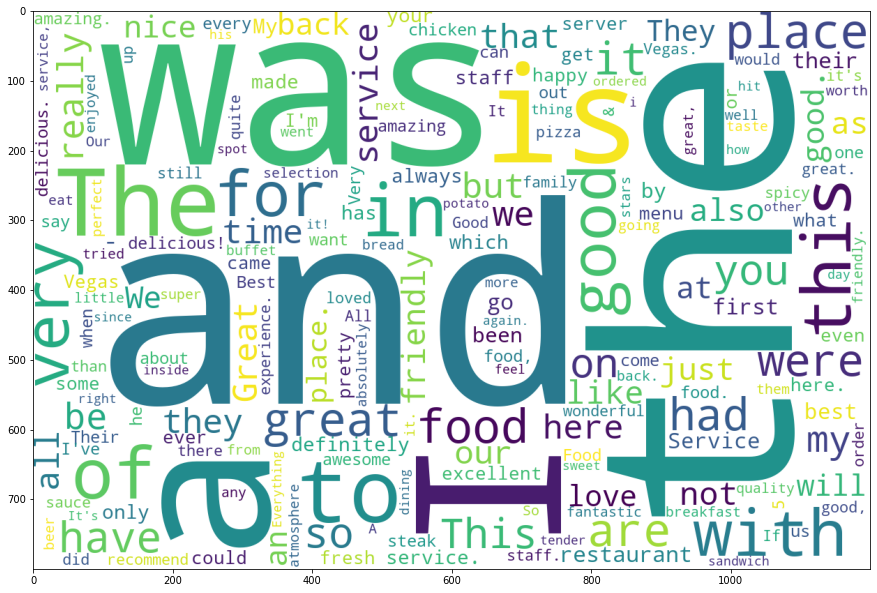

In [64]:
pyplot.imshow(Positive_word_cloud)

In [65]:
Nagative_word_cloud=WordCloud(width = 1200, height = 800,background_color ='white')

In [66]:
dictionary_of_frequency_of_Nagative_word=FreqDist(Whole_Nagative_Words_list)

In [67]:
Nagative_word_cloud.generate_from_frequencies(frequencies=dictionary_of_frequency_of_Nagative_word)

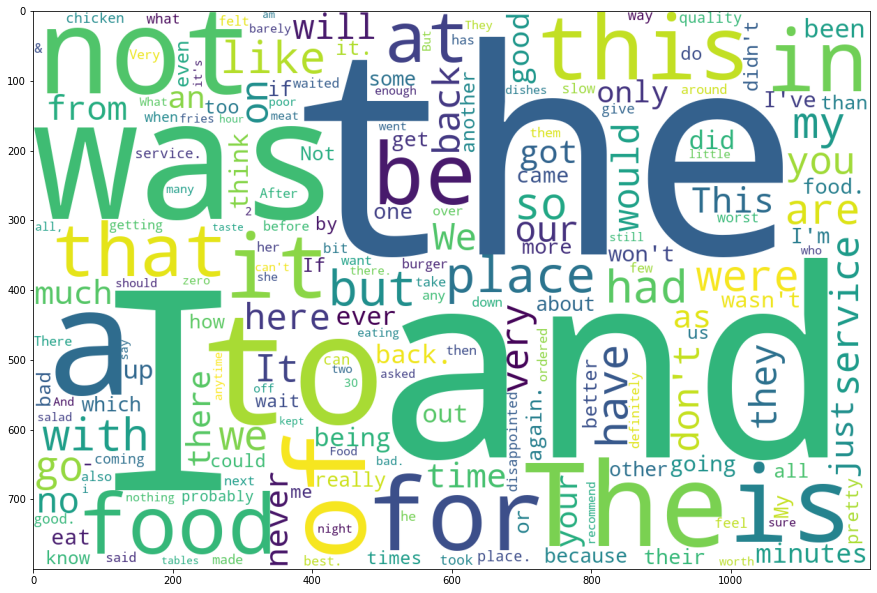

In [68]:
pyplot.imshow(Nagative_word_cloud)

# Morphological Analysis 👇

In [69]:
word_lemitizer=WordNetLemmatizer()

In [92]:
with open("../Models/word_lemitizer.pickle","wb") as f:
    pickle.dump(word_lemitizer,f)

In [70]:
Regular_expression_definition_for_html_tags=re.compile('<.*?>')
Regular_expression_definition_for_digits=re.compile('\d+\s|\s\d+|\s\d+\s')

In [87]:
word_to_be_handled=[
    "not",
    "no",
    "very"
]

In [71]:
english_stop_words=stopwords.words('english')

In [93]:
with open("../Models/english_stop_words.pickle","wb") as f:
    pickle.dump(english_stop_words,f)

In [89]:
def preprocessing_of_sentence(text):
    text=Regular_expression_definition_for_html_tags.sub(r" ",text)
    text=Regular_expression_definition_for_digits.sub(r" ",text)
    punctuations = [".",",","!","?","'",'"',":",";","*","-","/","+","%","$","#","@","(",")","[","]","{","}"]
    for i in punctuations:
        text = text.replace(i," ")
    text=text.lower().split()
    text=[word for word in text if word not in english_stop_words and len(word)>1 or word in word_to_be_handled]
    text=[word_lemitizer.lemmatize(word) for word in text]
    return text

In [73]:
Preprocessed_textual_data=[" ".join(preprocessing_of_sentence(text)) for text in data[review_column]]

In [74]:
Preprocessed_textual_data

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care le interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'also combo like burge

In [75]:
Preprocessed_Data=data

In [76]:
Preprocessed_Data[review_column]=Preprocessed_textual_data

In [77]:
Preprocessed_Data

,Review,Liked
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great price,1
...,...,...
995,think food flavor texture lacking,0
996,appetite instantly gone,0
997,overall impressed would go back,0
998,whole experience underwhelming think go ninja ...,0


In [79]:
Preprocessed_Data.to_csv('../Data/Processed_data/'+filename,index=False)